In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('interns.csv')

In [23]:
df.head()

,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Cohort
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,11-Aug-23,AUG 11 WD 23
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,11-Aug-23,AUG 11 WD 23
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,11-Aug-23,AUG 11 WD 23
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2681 non-null   object 
 1   First Name     2683 non-null   object 
 2   Age            2677 non-null   float64
 3   Country        2683 non-null   object 
 4   City           2677 non-null   object 
 5   Timezone       2668 non-null   object 
 6   EduQuest Date  2683 non-null   object 
 7   Cohort         2683 non-null   object 
dtypes: float64(1), object(7)
memory usage: 167.8+ KB


In [25]:
df.describe()

,Age
count,2677.000000
mean,26.223011
std,77.480071
min,-2.000000
25%,18.000000
50%,21.000000
75%,27.000000
max,2021.000000


In [26]:
df.isnull().sum()

ID                2
First Name        0
Age               6
Country           0
City              6
Timezone         15
EduQuest Date     0
Cohort            0
dtype: int64

In [27]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [28]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

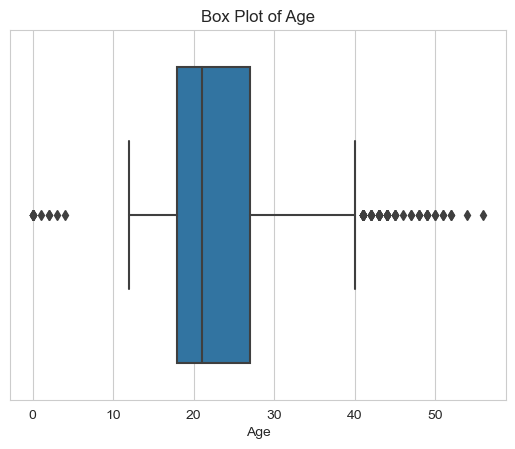

In [29]:
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Display the plot
plt.show()

In [30]:
df = df[(df['Age'] >= 13) & (df['Age'] <= 100)]

Age lower than 13 and greater than 100 is removed in above code.


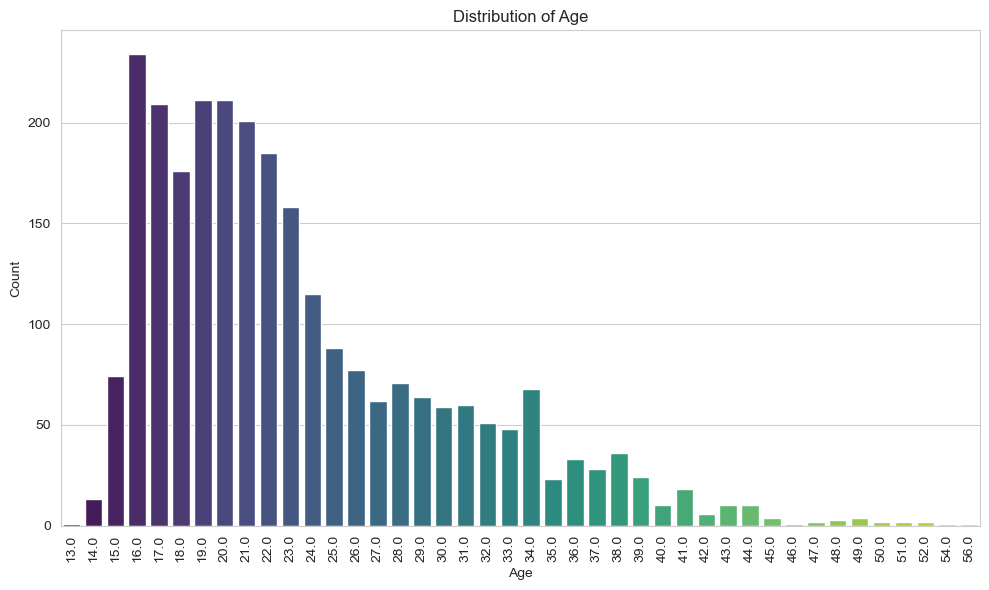

In [31]:
# Plot for for Age Distribution
sns.set_style('whitegrid')

# Plotting the distribution of 'Age'
plt.figure(figsize=(10, 6))
age_dist_plot = sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
# Create a new column for age groups
bins = [12, 20, float('inf')]
labels = ['13-20', '20+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Encode age groups as numeric values
df['Age Group Encoded'] = df['Age Group'].map({'13-20': 0, '20+': 1})

# Check the data
print(df.head())

      ID First Name   Age        Country      City   Timezone EduQuest Date  \
0   5272     Albina  16.0        Ukraine      Kyiv  GMT+03:00     11-Aug-23   
1  40345      Ceren  16.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   
2  40438      Dipin  20.0          Nepal  Katmandu  GMT+05:45     11-Aug-23   
3  40657    Violeta  25.0  United states  New_york  GMT-04:00     11-Aug-23   
4  40291      Cansu  17.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   

         Cohort Age Group Age Group Encoded  
0  AUG 11 WD 23     13-20                 0  
1  AUG 11 WD 23     13-20                 0  
2  AUG 11 WD 23       20+                 1  
3  AUG 11 WD 23       20+                 1  
4  AUG 11 WD 23     13-20                 0  


In [33]:
df['Age Group'].value_counts()
# df['Age Group'].isnull().sum()

20+      1738
13-20     918
Name: Age Group, dtype: int64

In [34]:
# df['Age Group Encoded'].value_counts()
df['Age Group Encoded'].isnull().sum()

0

In [35]:
from sklearn.cluster import KMeans
# Prepare data for clustering
X = df[['Age Group Encoded']]
df['Age Group Encoded'].dropna()
# kmeans clustering 
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

print(df.head())

      ID First Name   Age        Country      City   Timezone EduQuest Date  \
0   5272     Albina  16.0        Ukraine      Kyiv  GMT+03:00     11-Aug-23   
1  40345      Ceren  16.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   
2  40438      Dipin  20.0          Nepal  Katmandu  GMT+05:45     11-Aug-23   
3  40657    Violeta  25.0  United states  New_york  GMT-04:00     11-Aug-23   
4  40291      Cansu  17.0         Turkey  Istanbul  GMT+03:00     11-Aug-23   

         Cohort Age Group Age Group Encoded  Cluster  
0  AUG 11 WD 23     13-20                 0        0  
1  AUG 11 WD 23     13-20                 0        0  
2  AUG 11 WD 23       20+                 1        1  
3  AUG 11 WD 23       20+                 1        1  
4  AUG 11 WD 23     13-20                 0        0  


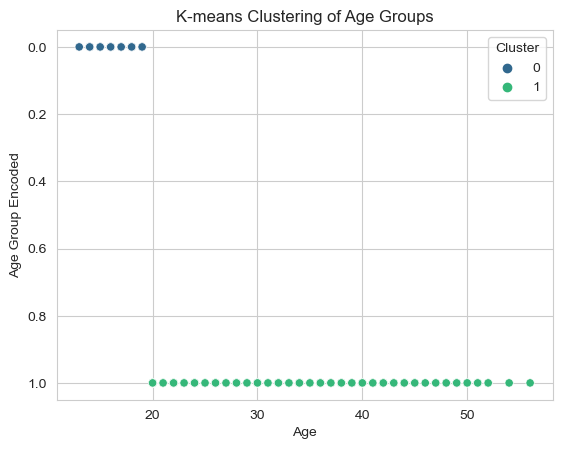

In [36]:
sns.scatterplot(x='Age', y='Age Group Encoded', hue='Cluster', palette='viridis', data=df)

# Add titles and labels
plt.title('K-means Clustering of Age Groups')
plt.xlabel('Age')
plt.ylabel('Age Group Encoded')
plt.legend(title='Cluster')
plt.show()

In [37]:
df.head()


,ID,First Name,Age,Country,City,Timezone,EduQuest Date,Cohort,Age Group,Age Group Encoded,Cluster
0,5272,Albina,16.0,Ukraine,Kyiv,GMT+03:00,11-Aug-23,AUG 11 WD 23,13-20,0,0
1,40345,Ceren,16.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23,13-20,0,0
2,40438,Dipin,20.0,Nepal,Katmandu,GMT+05:45,11-Aug-23,AUG 11 WD 23,20+,1,1
3,40657,Violeta,25.0,United states,New_york,GMT-04:00,11-Aug-23,AUG 11 WD 23,20+,1,1
4,40291,Cansu,17.0,Turkey,Istanbul,GMT+03:00,11-Aug-23,AUG 11 WD 23,13-20,0,0


In [38]:
from sklearn.metrics import silhouette_score
# Calculate evaluation metrics
silhouette_avg = silhouette_score(X, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 1.0000


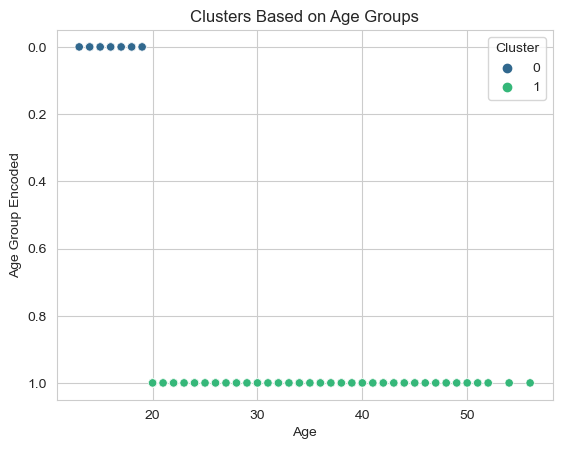

In [39]:
sns.scatterplot(x='Age', y='Age Group Encoded', hue='Cluster', palette='viridis', data=df)
plt.title('Clusters Based on Age Groups')
plt.xlabel('Age')
plt.ylabel('Age Group Encoded')
plt.legend(title='Cluster')
plt.show()

In [40]:
# Filter data based on cluster
cluster_0_data = df[df['Cluster'] == 0]
cluster_1_data = df[df['Cluster'] == 1]

# Define the file path
file_path = 'cluster_data.csv'

# Write data to separate sheets in an Excel file
with pd.ExcelWriter(file_path) as writer:
    cluster_0_data.to_excel(writer, sheet_name='Interns 13-20', index=False)
    cluster_1_data.to_excel(writer, sheet_name='Interns 20+', index=False)

print(f'Data has been exported to {file_path}')

Data has been exported to cluster_data.xlsx
